# EDA

1.Understand the data

2.Clean the data

3.Analyse correlectin between data points

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 5000)

# 1.Understand the data

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# 2.Clean the data
Drop irrelevent columns

Handle null values

Detect and fix the outliers

Categorical variables


In [6]:
#Drop irrelevent columns
df=df[['location', 'size', 'total_sqft', 'bath', 'balcony', 'price']]

In [7]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
#Handle null values
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df = df[df['location'].notna()]

In [10]:
df.isnull().sum()

location        0
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
df[['size', 'bath', 'balcony']].mode()

,size,bath,balcony
0,2 BHK,2.0,2.0


In [12]:
df['size']=df['size'].fillna(df['size'].mode()[0])
df['balcony']=df['balcony'].fillna(df['balcony'].mode()[0])
df['bath']=df['bath'].fillna(df['bath'].mode()[0])

<AxesSubplot:xlabel='price'>

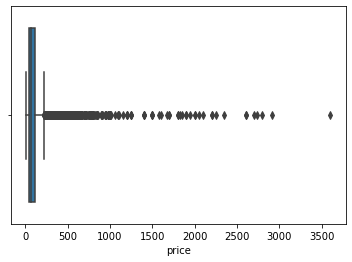

In [13]:
#Detect and fix the outliers
import seaborn as sns
sns.boxplot(x=df['price'])

In [14]:
filter1 = df["price"]<3450


In [15]:
df.where(filter1, inplace = True) 

<AxesSubplot:xlabel='price'>

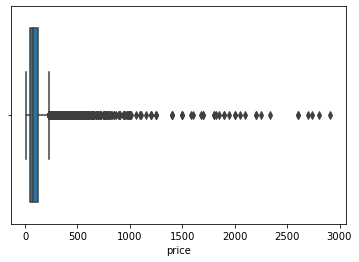

In [16]:
import seaborn as sns
sns.boxplot(x=df['price'])

# 3.Analyse correlectin between data points

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [19]:
df.corr()

,bath,balcony,price
bath,1.000000,0.208144,0.451283
balcony,0.208144,1.000000,0.126727
price,0.451283,0.126727,1.000000


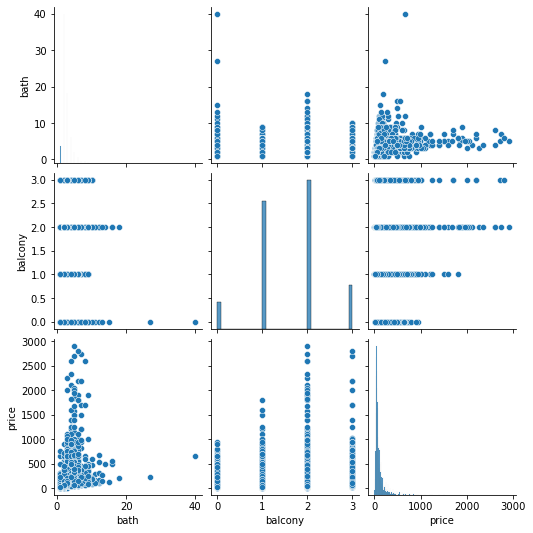

In [20]:
sns.pairplot(df, kind="scatter")
plt.show()

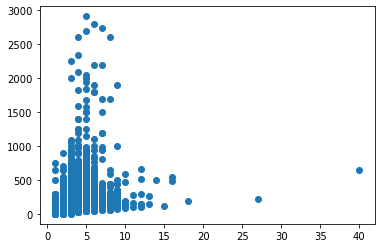

In [21]:
plt.scatter(df['bath'], df['price'])
plt.show()

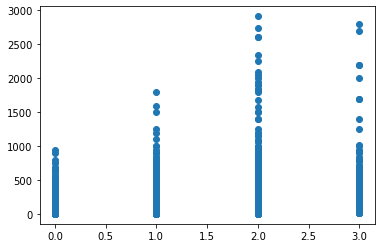

In [22]:
plt.scatter(df['balcony'], df['price'])
plt.show()

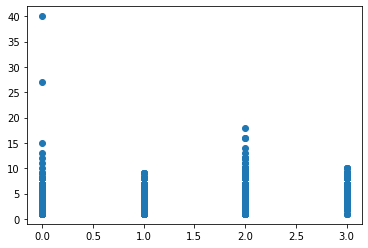

In [23]:
plt.scatter(df['balcony'], df['bath'])
plt.show()

In [ ]:
#Categorical variables


In [ ]:
df.info()

In [ ]:
df['location'].value_counts()

In [ ]:
df['size'].value_counts()

In [ ]:
df['total_sqft'].value_counts()

In [ ]:
import numpy as np

In [ ]:
threshold = 10 # Anything that occurs less than this will be removed.
for col in df.columns:
    value_counts = df['total_sqft'].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    df['total_sqft'].replace(to_remove, np.nan, inplace=True)

In [ ]:
df['total_sqft'].value_counts()

In [ ]:
threshold = 10 # Anything that occurs less than this will be removed.
for col in df.columns:
    value_counts = df['size'].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    df['size'].replace(to_remove, np.nan, inplace=True)

In [ ]:
df['size'].value_counts()

In [ ]:
threshold = 10 # Anything that occurs less than this will be removed.
for col in df.columns:
    value_counts = df['location'].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    df['location'].replace(to_remove, np.nan, inplace=True)

In [ ]:
df['location'].value_counts()

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df=df.dropna()

In [ ]:
df.head()

In [ ]:
df.nunique()

In [ ]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
df = encoder.fit_transform(df)
df.head()

# Split Train&Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df['price']
X=df.drop(['price'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Building

In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)